### Análise de Séries Temporais em Python

Problema de Negócio:

Usando dados históricos das vendas ao longo de 2023 seria possível prever o total de vendas em Janeiro/2024?

In [ ]:
# Versão Ptyhon
from platform import python_version
print('Versão Ppython: ', python_version())

In [46]:
# Importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

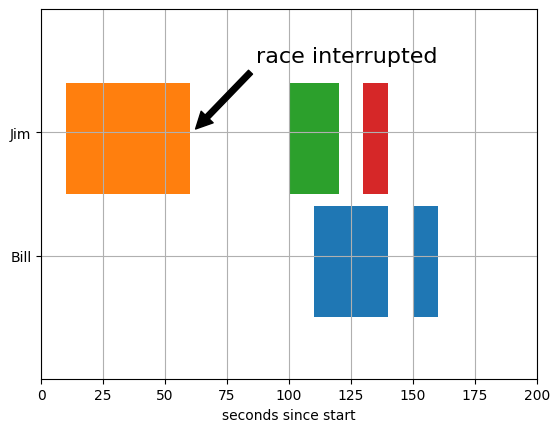

In [47]:
# Horizontal bar plot with gaps
fig, ax = plt.subplots()
ax.broken_barh([(110, 30), (150, 10)], (10, 9), facecolors='tab:blue')
ax.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9),
               facecolors=('tab:orange', 'tab:green', 'tab:red'))
ax.set_ylim(5, 35)
ax.set_xlim(0, 200)
ax.set_xlabel('seconds since start')
ax.set_yticks([15, 25], labels=['Bill', 'Jim'])     # Modify y-axis tick labels
ax.grid(True)                                       # Make grid lines visible
ax.annotate('race interrupted', (61, 25),
            xytext=(0.8, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            horizontalalignment='right', verticalalignment='top')

plt.show()

### Carregando os dados

In [ ]:
# Carrega do Dataset
df_dsa = pd.read_csv('dataset.csv')

In [ ]:
df_dsa.shape

In [ ]:
df_dsa.columns

In [ ]:
df_dsa.head()

In [ ]:
df_dsa.tail()

### Pré processamento dos dados

In [ ]:
# Valor mmínimo  da coluna data
df_dsa['Data'].min()

In [ ]:
# Valor máximo da coluna daeta
df_dsa['Data'].max()

In [ ]:
# Converte a coluna de data em tipe datetime
df_dsa['Data'] = pd.to_datetime(df_dsa['Data'])

In [ ]:
df_dsa.head()

In [ ]:
df_dsa.info()

In [ ]:
# convertender o dataFrame em uma sério temporal com a data como índice
serie_temporal = df_dsa.set_index('Data')['Total_Vendas']

In [ ]:
type(serie_temporal)

In [ ]:
serie_temporal

In [ ]:
# Fornece a freQuencia da série temporal (diária, neste caso)
serie_temporal = serie_temporal.asfreq('D')

In [54]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

### Análise Exploratória

TypeError: 'bool' object is not callable

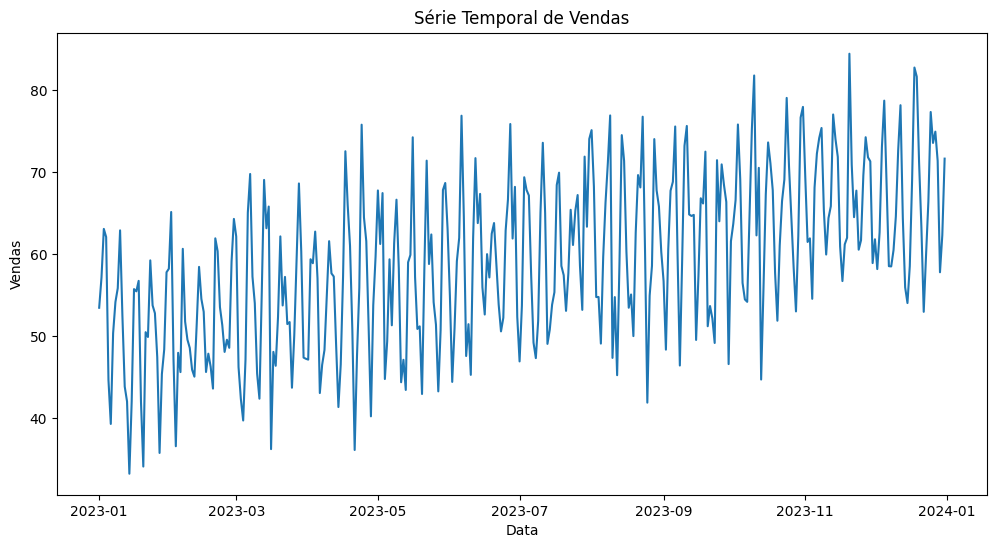

In [42]:
# Cria o gráfico da série temporal (sem formatação)
plt.figure(figsize =(12, 6))
plt.plot(serie_temporal)
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Série Temporal de Vendas')
plt.grid(True, color='r', linestyle='-', linewidth=2)
plt.show()

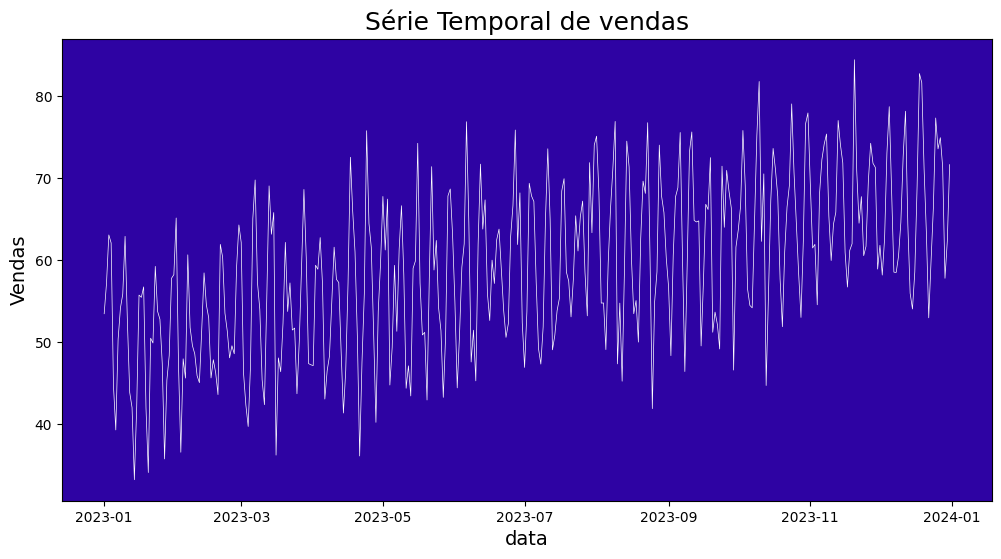

In [49]:
# Cria um gŕafico da série temporal (com formatação)

# Cria o gráfico da série temporal com layout de contrast
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal, color = 'white', linewidth = 0.5)

# configurarar as cores e estilo do gráfico
plt.gca().set_facecolor('#2e03a3')
#plt.grid(True, color = 'yellow', linestyle = '__', linewidht = 0.5)

# configurar rótulos dos eixoa título e legenda
plt.xlabel('data', color = 'black', fontsize = 14)
plt.ylabel('Vendas', color = 'black', fontsize = 14)
plt.title('Série Temporal de vendas', color = 'black', fontsize = 18)

#configurar as cores dos eixos dos ticks (Marcadores)
plt.tick_params(axis = 'x', colors = 'black')
plt.tick_params(axis = 'y', colors = 'black')

plt.show()

<Axes: xlabel='Data', ylabel='Total_Vendas'>

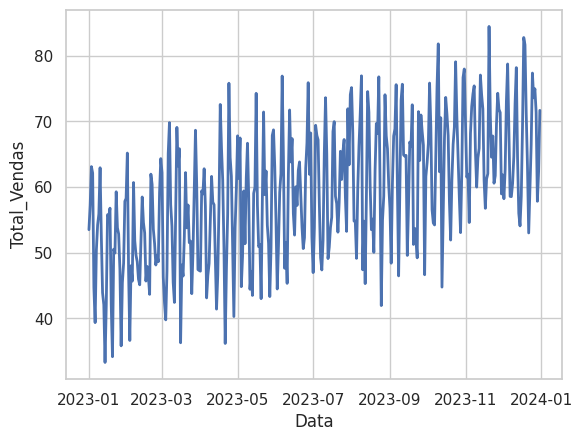

In [59]:

sns.set_theme(style="whitegrid")

sns.lineplot(data=serie_temporal,linewidth=2, sizes = (18, 10))

### Suaviazação Exponencial

A suavização exponencial é uma técnica de análise e previsão de séries temporais que aplica médias ponderadas aos dados históricos, onde os pesos diminuem exponencialmente à medida que os dados ficam mais antigos. a suavização exponencial é útl para lidar com tendências e sazonalidades nos dados, e para reduzir o ruído.

### Suposições da suavização Exponencial
https://www.statsmodels.org/dev/generated/statsmodels_tsa.holwinters.SimpleExpSmoothing.html

No statsmodels, a classe simpleExpSmoothing é uma implementação da técnica de suavização exponencial simples, que é uma versão mais básica da suavização exponencial que não lida explicitamente com tendências e sazonalidades.

O modelo simples ExpSmoothing do statsmodels, também conhecido como suavização explonecial simples ou kédia exponencialmente ponderada, é uma técnica de suavização de séries temporais que atribui pesos decrescentes exponencialmente aos pontos de dados passados. Ele é usado principalmente para suavizar séries temporais e fazer previsões de  curto prazo. As principais suposições do modelo simples ExpSmoothing são as seguintes:

 * A Série temporal é composta por um componente de nível(média) e um componente de erro aleatório (ruído). Não há compomentes de tendência ou sazonalidade na série.
 * O compomente de nível é uma média ponderada dos valores passados, com pesos que diminuem exponencialmente à medida que os dados ficam mais distantes no passado.
 * O compomente de erro aléatório é normalmente distribuído com média zero e variância constante. Além disso, os erros são independentes e identicamente distribuidos.
 * O parâmetro de suavização (alfa) é uma constante entre  0 e 1, que determina a taxa de decaimenteo dos pesos, valores proximos de 1 dão maior peso aos dados mais relevantes.